<a href="https://colab.research.google.com/github/sivasaiyadav8143/Machine-Learning-with-Python/blob/master/Outlier_Detection_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Local Outlier Factor (LOF)

LOF is an unsupervised (well, semi-supervised) machine learning algorithm that uses the density of data points in the distribution as a key factor to detect outliers.<br>
LOF compares the density of any given data point to the density of its neighbors. Since outliers come from low-density areas, the ratio will be higher for anomalous data points. As a rule of thumb, a normal data point has a LOF between 1 and 1.5 whereas anomalous observations will have much higher LOF. The higher the LOF the more likely it is an outlier. If the LOF of point X is 5, it means the average density of X’s neighbors is 5 times higher than its local density.

In [ ]:
# data preparation
import pandas as pd
import numpy as np
# data visualzation
import matplotlib.pyplot as plt
import seaborn as sns
# outlier/anomaly detection
from sklearn.neighbors import LocalOutlierFactor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# data
df = pd.DataFrame(np.array([[0,1], [1,1], [1,2], [2,2], [5,6]]), columns = ["x", "y"], index = [0,1,2,3,4])

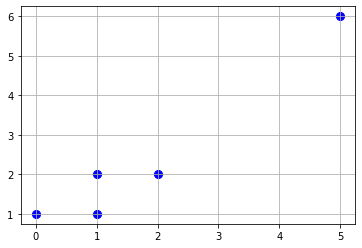

In [ ]:
# plot data points
plt.scatter(df["x"], df["y"], color = "b", s = 65)
plt.grid()

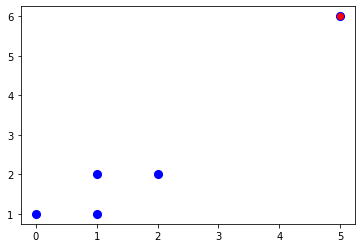

In [ ]:
# model specification
model1 = LocalOutlierFactor(n_neighbors = 2, metric = "manhattan", contamination = 0.02)
# model fitting
y_pred = model1.fit_predict(df)
# filter outlier index
outlier_index = np.where(y_pred == -1) # negative values are outliers and positives inliers
# filter outlier values
outlier_values = df.iloc[outlier_index]
# plot data
plt.scatter(df["x"], df["y"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["x"], outlier_values["y"], color = "r")

## PyOD 
Detecting and treating outliers is also a major cog in the data exploration stage. The quality of your inputs decide the quality of your output!

[PyOD](https://github.com/yzhao062/pyod) is a scalable Python toolkit for detecting outliers in multivariate data. It provides access to around 20 outlier detection algorithms under a single [well-documented](https://pyod.readthedocs.io/en/latest/) API.

In [ ]:
!pip install pyod
!pip install --upgrade pyod  # to make sure that the latest version is installed!